In [1]:
!pip install -q sentence-transformers


In [3]:
pip install "numpy<2"


  Using cached numpy-1.26.4-cp312-cp312-macosx_10_9_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_10_9_x86_64.whl (20.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn matplotlib umap-learn


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 20.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [umap-learn]4 [umap-learn]
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sentence_transformers import SentenceTransformer
import json

model = SentenceTransformer('all-MiniLM-L6-v2')

#load json file
with open('./data/dreps_data_adastat.json', 'r') as f:
    data = json.load(f)
    data = data['rows']
# set dict to contain text , name and vector
data_dict = []
print(data[0])
for item in data:
    text = str(item['comment']) + " " + str(item['objectives']) + " " + str(item['motivations'])
    name = str(item['given_name'])
    vector = model.encode(text).tolist()  # Convert to list for JSON serialization
    live_stake = int(item['live_stake'])/1000000
    delegator = int(item['delegator'])
    data_dict.append({'text': text, 'name': name, 'vector': vector, 
                      'live_stake': live_stake, 'delegator': delegator})

print(data_dict[1])

/Users/Joel/Documents/GitHub/ada_drep/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'hash': None, 'bech32_legacy': 'drep_always_abstain', 'has_script': False, 'tx_hash': None, 'url': None, 'comment': None, 'payment_address': None, 'given_name': None, 'objectives': None, 'motivations': None, 'qualifications': None, 'image': None, 'live_stake': '6295968975613874', 'delegator': 110670, 'tx_time': None, 'last_active_epoch': None, 'bech32': 'drep_always_abstain'}
{'text': 'None Cardano日本コミュニティとCardanoのガバナンスの橋渡しを実現したいと考えてます。日本はCardano発祥の地で多くのホルダーが存在し、非常にガバナンス上重要な影響を与える力を持っていますが、技術の障壁および言語の障壁から、難解でついていけてない人が多いです。コンテンツやミートアップなどを通じて、日本コミュニティがガバナンスを理解するのを助けたいと考えています。\nI want to bridge the gap between the Japanese Cardano community and Cardano governance. Japan is the birthplace of Cardano, and there are many holders, who have the power to have a significant influence on governance, but many people find it difficult to follow due to technical and language barriers. Through content and meetups, I will help the Japanese community understand governance. Cardanoが数十億人の経済アイデンティティを支える

{0: [{'text': 'None None None', 'name': 'None', 'vector': [-0.0013376360293477774, 0.0319054014980793, -0.07617224752902985, -0.01755106821656227, -0.0018616863526403904, 0.058239247649908066, 0.011832651682198048, -0.053852397948503494, 0.05810834839940071, 0.005537648219615221, 0.06492851674556732, -0.11525149643421173, -0.004574690014123917, -0.07801709324121475, -0.08406735956668854, 0.026935039088129997, -0.0466531440615654, -0.10609225928783417, -0.010334240272641182, -0.011658922769129276, -0.06300538778305054, -0.0545707643032074, 0.018395736813545227, -0.001859324867837131, -0.04527602344751358, -0.03995804116129875, -0.005497544538229704, -0.0026473163161426783, 0.005750331562012434, -0.11944969743490219, -0.026862647384405136, 0.007547823712229729, 0.036375705152750015, 0.015361781232059002, 0.06910480558872223, -0.05609193071722984, 0.06126019358634949, 0.018164610490202904, -0.005708642303943634, 0.01190521102398634, -0.050156477838754654, -0.08050363510847092, -0.01170459

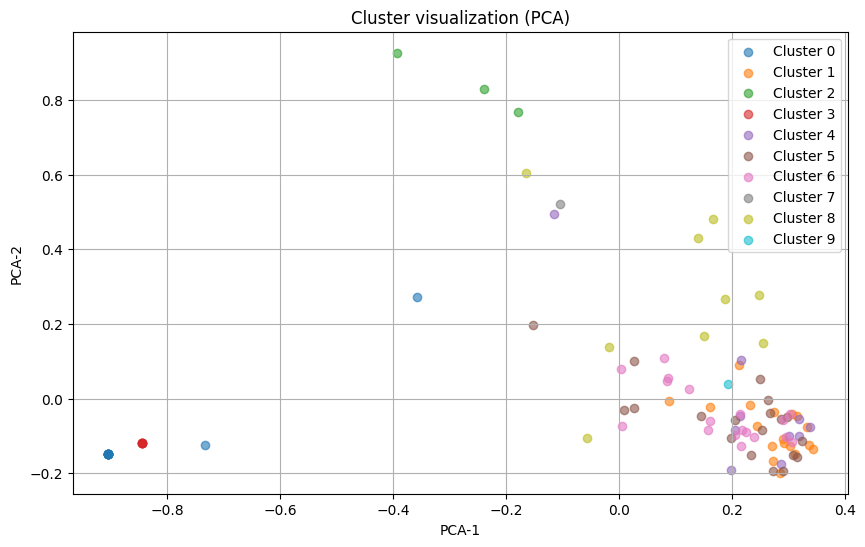

In [27]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


# Extract embeddings
vectors = [item['vector'] for item in data_dict]

# Run KMeans clustering
k = 10
kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
cluster_labels = kmeans.fit_predict(vectors)

# Organize items by cluster
groups = {i: [] for i in range(k)}
for label, item in zip(cluster_labels, data_dict):
    groups[label].append(item)
print(groups)
# Print results per cluster
for cluster_id, items in groups.items():
    print(f"\nCluster {cluster_id} ({len(items)} profiles):")

    names = [str(item['name']) if item['name'] is not None else "Unknown" for item in items]
    print("Names (sample):", ", ".join(names))

    live_stakes = [item['live_stake'] for item in items]
    delegators = [item['delegator'] for item in items]
    # Live Stake Stats
    print(f"\n Live Stake Stats:")
    print(f"  Mean:     {np.mean(live_stakes):,.2f}")
    print(f"  Median:   {np.median(live_stakes):,.2f}")
    print(f"  Std Dev:  {np.std(live_stakes):,.2f}")
    print(f"  Min:      {np.min(live_stakes):,.2f}")
    print(f"  Max:      {np.max(live_stakes):,.2f}")
    print(f"  Q1 (25%): {np.percentile(live_stakes, 25):,.2f}")
    print(f"  Q3 (75%): {np.percentile(live_stakes, 75):,.2f}")

    # Delegator Stats
    print(f"\n Delegator Stats:")
    print(f"  Mean:     {np.mean(delegators):,.2f}")
    print(f"  Median:   {np.median(delegators):,.2f}")
    print(f"  Std Dev:  {np.std(delegators):,.2f}")
    print(f"  Min:      {np.min(delegators):,.2f}")
    print(f"  Max:      {np.max(delegators):,.2f}")
    print(f"  Q1 (25%): {np.percentile(delegators, 25):,.2f}")
    print(f"  Q3 (75%): {np.percentile(delegators, 75):,.2f}")

# 🎨 Optional: Visualize clusters in 2D using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(10, 6))
for cluster_id in range(k):
    points = np.array([reduced[i] for i in range(len(reduced)) if cluster_labels[i] == cluster_id])
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {cluster_id}', alpha=0.6)

plt.title("Cluster visualization (PCA)")
plt.legend()
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.grid(True)
plt.show()

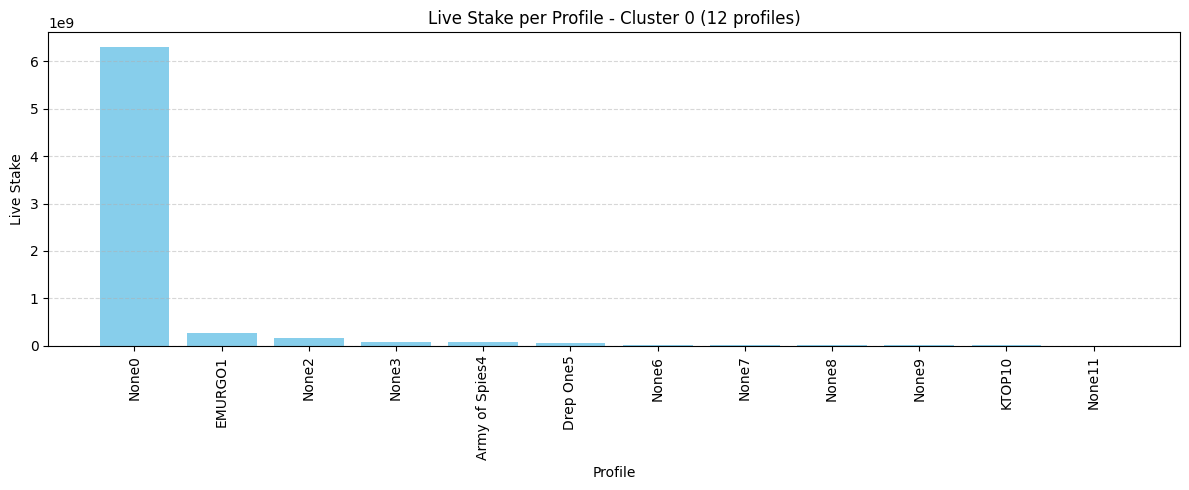

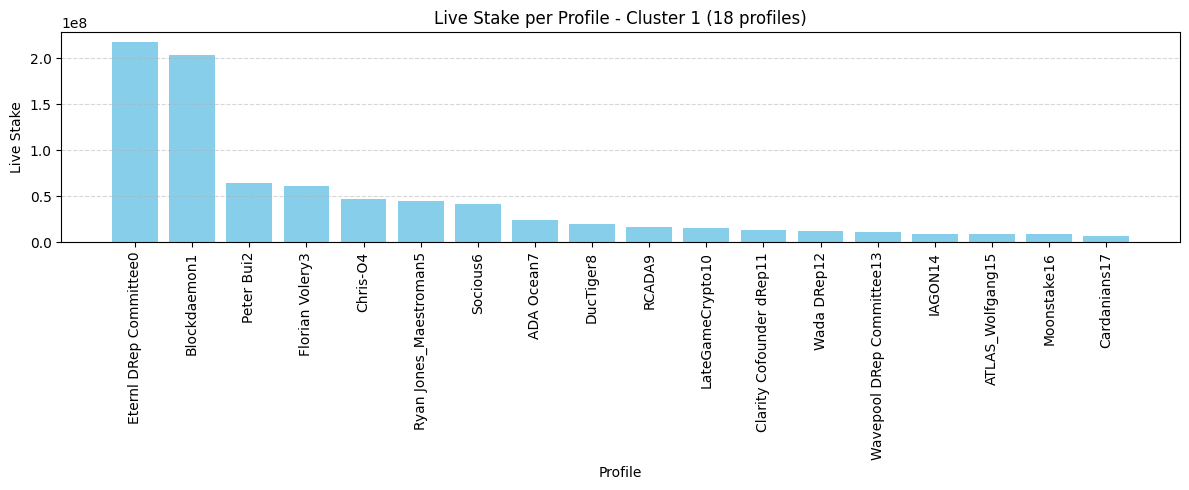

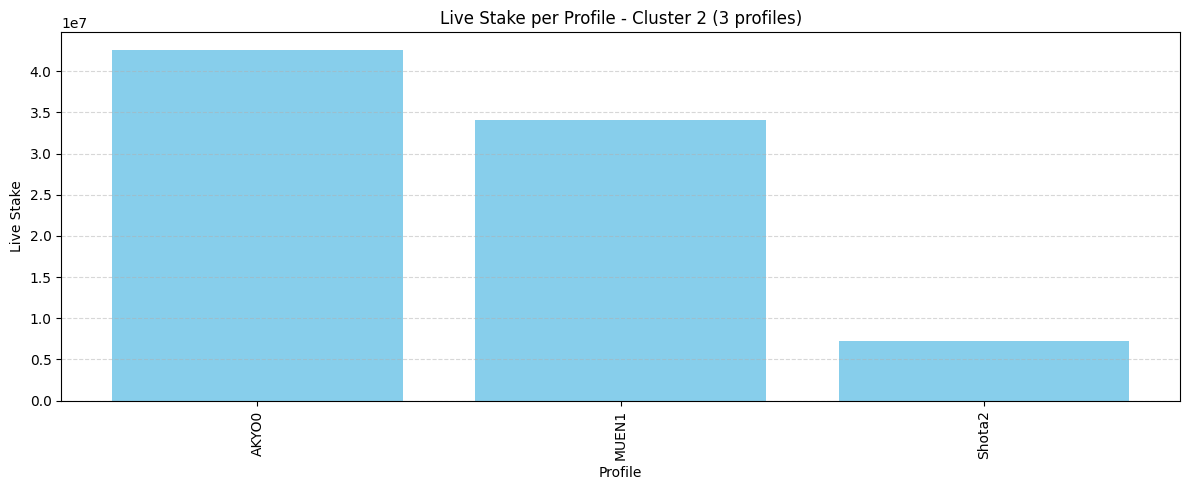

/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_78802/682968039.py:13: UserWarning: Glyph 24544 (\N{CJK UNIFIED IDEOGRAPH-5FE0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_78802/682968039.py:13: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Joel/Documents/GitHub/ada_drep/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24544 (\N{CJK UNIFIED IDEOGRAPH-5FE0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Joel/Documents/GitHub/ada_drep/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


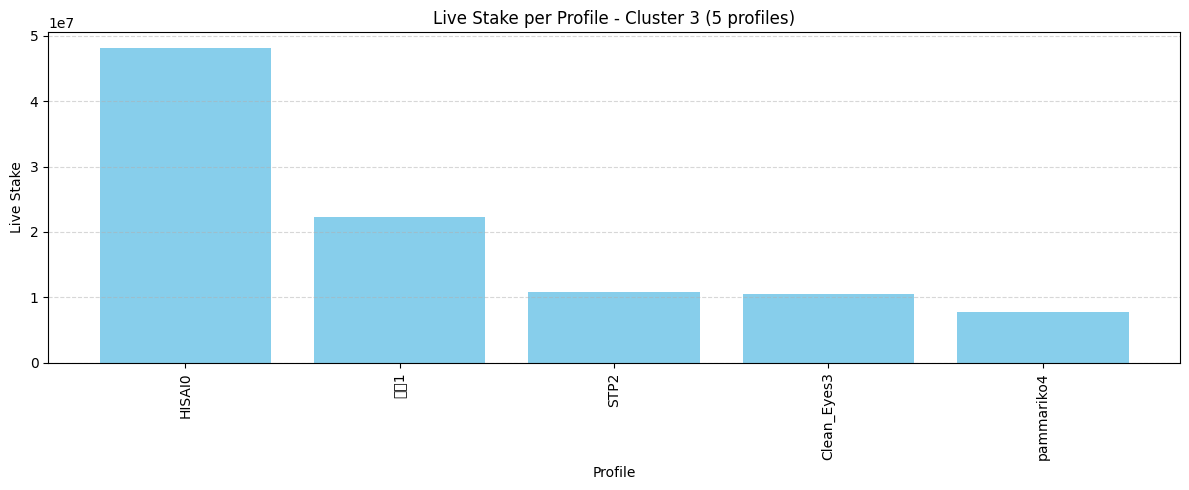

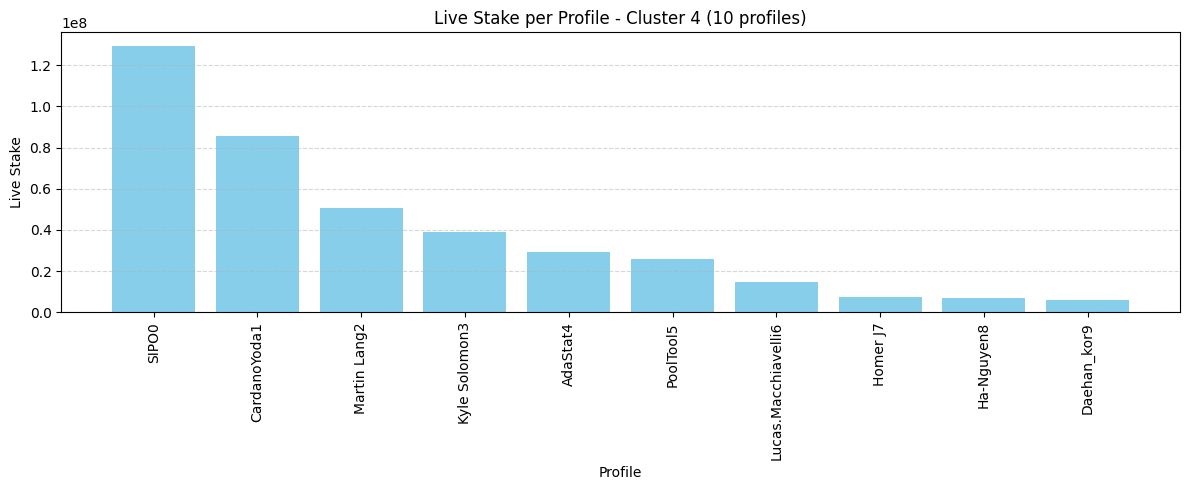

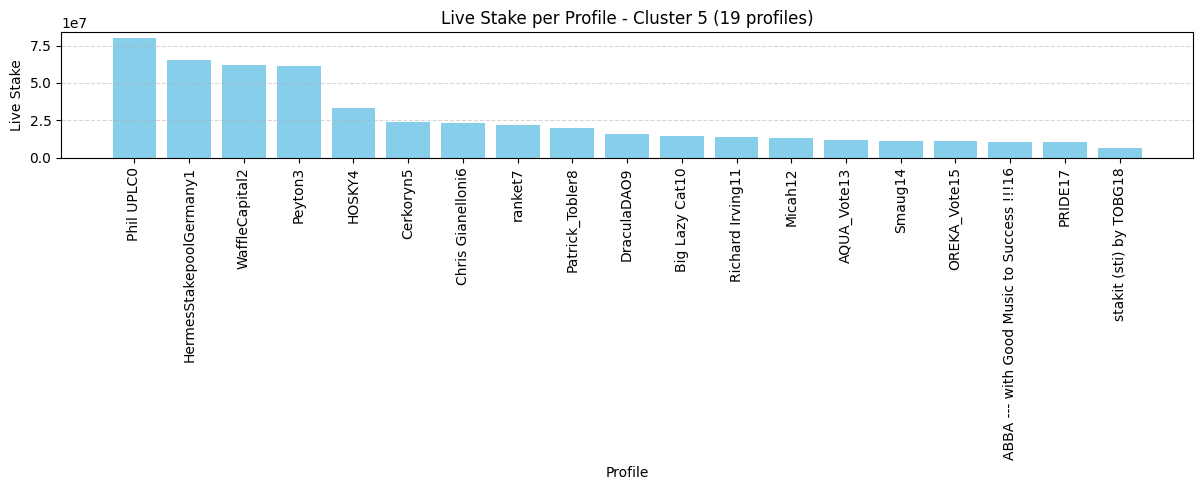

/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_78802/682968039.py:13: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_78802/682968039.py:13: UserWarning: Glyph 12496 (\N{KATAKANA LETTER BA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_78802/682968039.py:13: UserWarning: Glyph 129375 (\N{DUMPLING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Joel/Documents/GitHub/ada_drep/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Joel/Documents/GitHub/ada_drep/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12496 (\N{KATAKANA LETTER BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

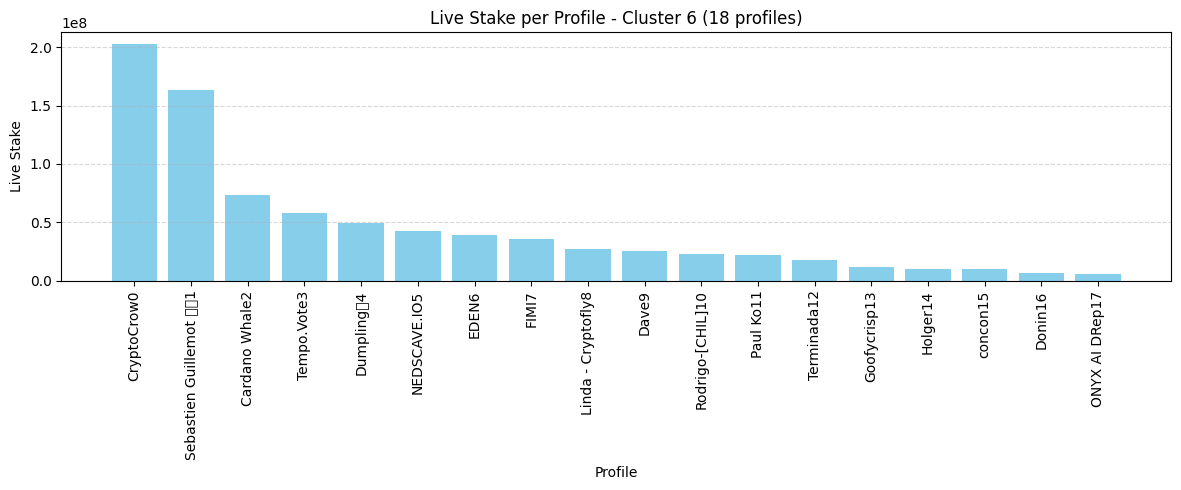

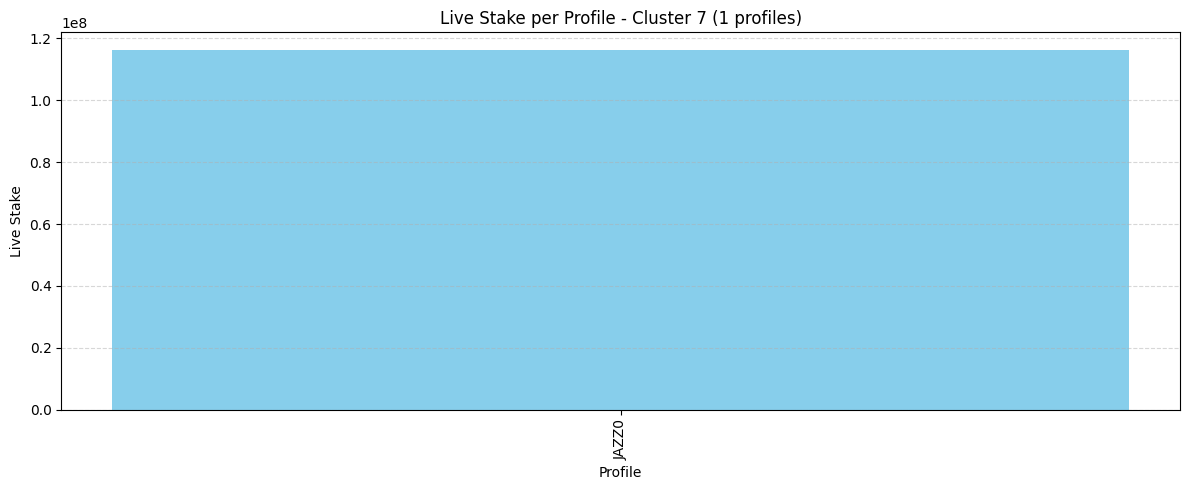

/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_78802/682968039.py:13: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_78802/682968039.py:13: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_78802/682968039.py:13: UserWarning: Glyph 12414 (\N{HIRAGANA LETTER MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_78802/682968039.py:13: UserWarning: Glyph 12427 (\N{HIRAGANA LETTER RU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Joel/Documents/GitHub/ada_drep/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Joel/Documents

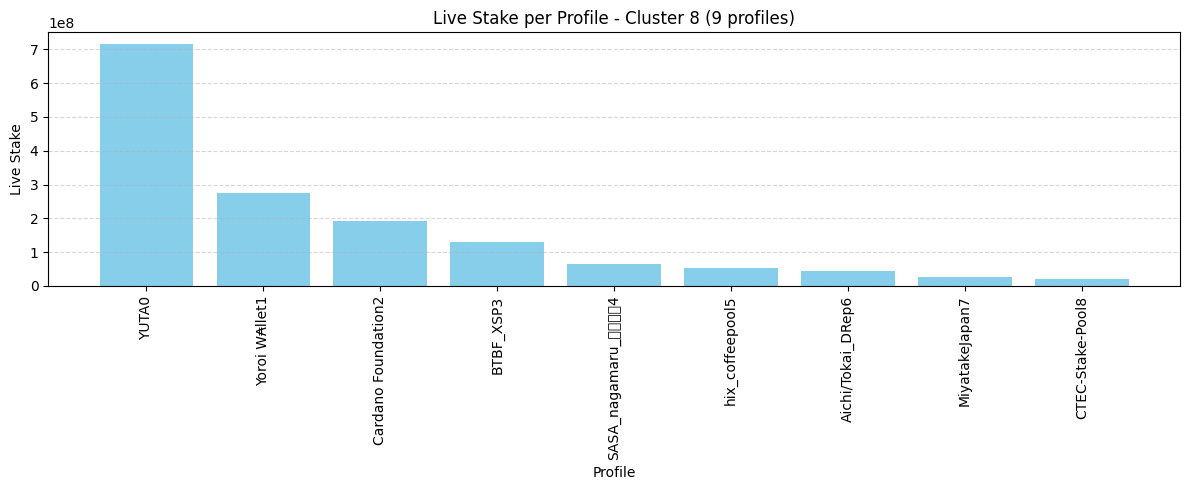

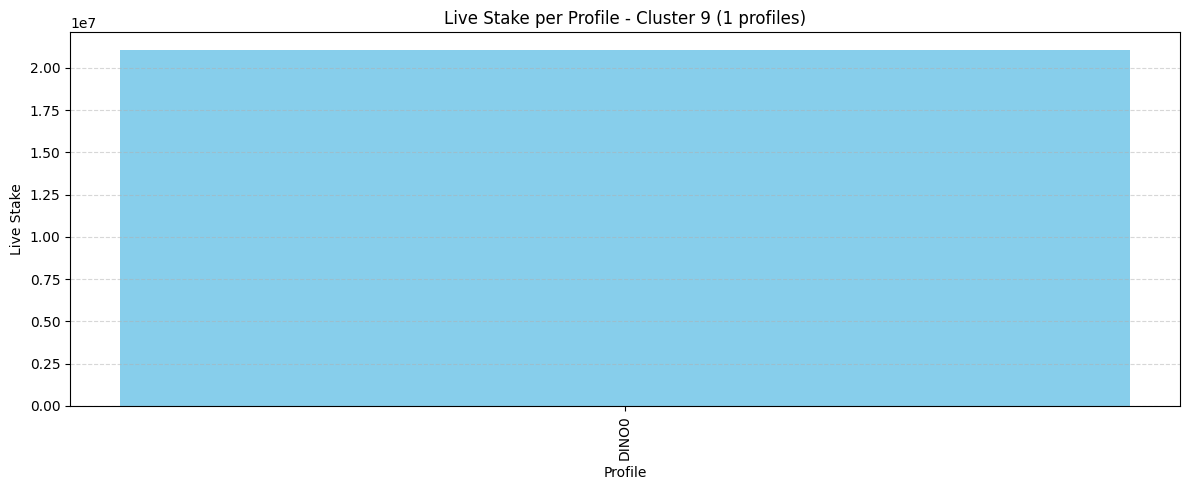

In [28]:
import matplotlib.pyplot as plt

for cluster_id, items in groups.items():
    names = [item['name']+str(i) if item['name'] is not None else f'Unknown_{i}' for i, item in enumerate(items)]
    stakes = [item['live_stake'] for item in items]

    plt.figure(figsize=(12, 5))
    plt.bar(names, stakes, color='skyblue')
    plt.title(f'Live Stake per Profile - Cluster {cluster_id} ({len(items)} profiles)')
    plt.xlabel('Profile')
    plt.ylabel('Live Stake')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()


/var/folders/vb/cd5tlbwj1gg4b3zk4dtfg1th0000gq/T/ipykernel_78802/1369366608.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(stake_data, labels=labels, patch_artist=True)


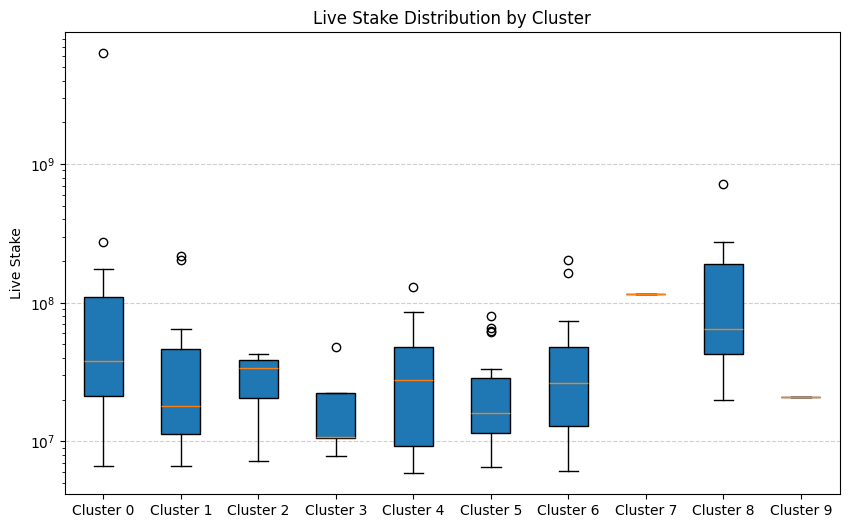

In [29]:
# Prepare data
stake_data = []
labels = []

for cluster_id, items in groups.items():
    stakes = [item['live_stake'] for item in items]
    stake_data.append(stakes)
    labels.append(f'Cluster {cluster_id}')

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(stake_data, labels=labels, patch_artist=True)
plt.title("Live Stake Distribution by Cluster")
plt.ylabel("Live Stake")
# set log scale for y-axis
plt.yscale('log')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()
